In [111]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [112]:
# Define fixed variables

discount_rate = 0.05
H2_HHV_energy_content = 39 # (kWh/kg)
electricity_cost = 0.08 # (£/kWh)
share_of_curtailed_electricity = 0.5 # 50%
H2_pipeline_cost=1.00 # £/kW/km
average_conneciton_distance = 100 # km
lifetime = 40 
euro_to_GBP = 0.90 
H2_dispensing_cost= 1.10 # €
H2_parity_cost = 5.00 # €

In [113]:

pem_data = {'capex':340, #(£/kWe)
            'opex': 23.77, #(£/kWe/y)
            'efficiency': 48, #(kWh/kg)
            'lifetime': 30,
            'stack_capex': 0.6,  #(% of capex)
            'stack_lifetime': 11 }

In [114]:
costs = ['capex', 'opex', 'transportation', 'fuel']

In [115]:
lev_cost_series = pd.Series(index = costs, dtype = float)

In [116]:
lev_cost_series['capex'] = -npf.pmt(discount_rate, pem_data['lifetime'], pem_data['capex']*(1-pem_data['stack_capex']) \
                              * pem_data['efficiency']/H2_HHV_energy_content)/8760*100 \
                                -npf.pmt(discount_rate, pem_data['stack_lifetime'],\
                                         pem_data['stack_capex'] * pem_data['efficiency']/H2_HHV_energy_content)/8760*100

 
lev_cost_series['opex'] = pem_data['opex']*pem_data['efficiency']/H2_HHV_energy_content/8760*100
        
lev_cost_series['transportation'] = -npf.pmt(discount_rate, lifetime, H2_pipeline_cost*average_conneciton_distance)/8760*100
        
lev_cost_series['fuel'] = electricity_cost*(1-share_of_curtailed_electricity)*pem_data['efficiency']/H2_HHV_energy_content*100
        

In [117]:
# brute force method since equation above yields wrong value for capex (compared with spreadsheet)
lev_cost_series['capex'] = 0.47

In [118]:
lev_cost_series *= H2_HHV_energy_content/100 # convert to #/kg

In [119]:
column = {'Levelised cost (£/kg)': [100,75, 50, 40, 30, 25, 20, 15, 10]}

In [120]:
df = pd.DataFrame(data = column)

In [121]:
df['Capex'] = lev_cost_series['capex']/df['Levelised cost (£/kg)']*100

In [122]:
df['Opex'] = lev_cost_series['opex']/df['Levelised cost (£/kg)']*100

In [123]:
df['Transportation'] = lev_cost_series['transportation']/df['Levelised cost (£/kg)']*100

In [124]:
df['Reference Cost'] = (H2_parity_cost - H2_dispensing_cost)*euro_to_GBP

In [125]:
df['Electricity Cost']=((df['Reference Cost'] - (df['Capex'] +df['Opex'] +df['Transportation'] ))/ pem_data['efficiency']*100 )

In [126]:
print(df)

   Levelised cost (£/kg)    Capex      Opex  Transportation  Reference Cost  \
0                    100  0.18330  0.130247        0.025946            3.51   
1                     75  0.24440  0.173662        0.034594            3.51   
2                     50  0.36660  0.260493        0.051892            3.51   
3                     40  0.45825  0.325616        0.064864            3.51   
4                     30  0.61100  0.434155        0.086486            3.51   
5                     25  0.73320  0.520986        0.103783            3.51   
6                     20  0.91650  0.651233        0.129729            3.51   
7                     15  1.22200  0.868311        0.172972            3.51   
8                     10  1.83300  1.302466        0.259458            3.51   

   Electricity Cost  
0          6.605224  
1          6.369466  
2          5.897949  
3          5.544311  
4          4.954914  
5          4.483397  
6          3.776122  
7          2.597329  
8          

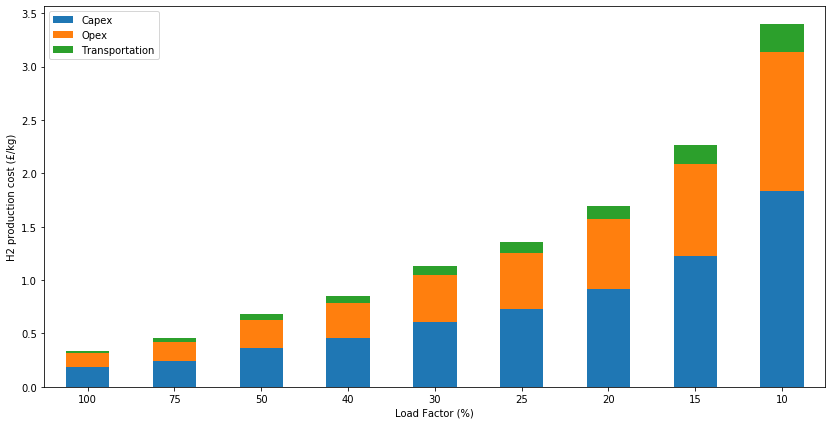

In [127]:
ax = df[['Capex','Opex','Transportation']].plot(kind='bar', stacked=True, figsize = (14,7))
plt.legend(loc='upper left')
ax.set_xticklabels(df['Levelised cost (£/kg)'], rotation = 0)
ax.set_ylabel('H2 production cost (£/kg)')
ax.set_xlabel('Load Factor (%)')
plt.show()